In [2]:
# Plot the distribution of the different properties of the dataset

In [4]:
import sys
sys.path.append('../')
import dataset_arcgen

In [3]:
config = {
    'input_stride': 10,
    'data_path': '../dataset_arcgen/',
    'debug': False,
    'sentence_length': 4
}
train_dataset = dataset_arcgen.ArcGenDataset(config, mode='train', transform=None)

In [4]:
train_dataset[0][1]

tensor([ 2, 12,  6, 20], dtype=torch.uint8)

In [5]:
import numpy as np
from tqdm import tqdm

In [6]:
result = np.zeros((22))
for i in tqdm(range(len(train_dataset))):
#for i in tqdm(range(100)):
    for j in range(4):
        result[train_dataset[i][1][j]] += 1
result

100%|██████████| 9576/9576 [17:06<00:00,  9.33it/s]


array([   0.,    0., 4007., 2455., 1451., 1663., 5210., 4366., 1154.,
       1175.,  682., 1157., 1190., 1220., 1107., 1130.,  761.,  527.,
        916.,  960., 6491.,  682.])

In [6]:
result = np.array([   0.,    0., 4007., 2455., 1451., 1663., 5210., 4366., 1154.,
       1175.,  682., 1157., 1190., 1220., 1107., 1130.,  761.,  527.,
        916.,  960., 6491.,  682.])

In [6]:
import matplotlib.pyplot as plt
DICTIONARY = ['EOS', '_containing', '_contain', '_pick_place', '_rotate', '_slide',
              'metal', 'rubber',
              'yellow', 'cyan', 'gold', 'brown', 'red', 'gray', 'purple', 'blue', 'green',
              'sphere', 'cube', 'cylinder', 'cone', 'spl']

plt.bar(DICTIONARY, result)

NameError: name 'result' is not defined

/tmp/ipykernel_3835/769023268.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(DICTIONARY[2:6], rotation=45, fontsize=label_size)
/tmp/ipykernel_3835/769023268.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(DICTIONARY[6:8], rotation=45, fontsize=label_size)
/tmp/ipykernel_3835/769023268.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(DICTIONARY[8:17], rotation=45, fontsize=label_size)
/tmp/ipykernel_3835/769023268.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(DICTIONARY[17:22], rotation=45, fontsize=label_size)


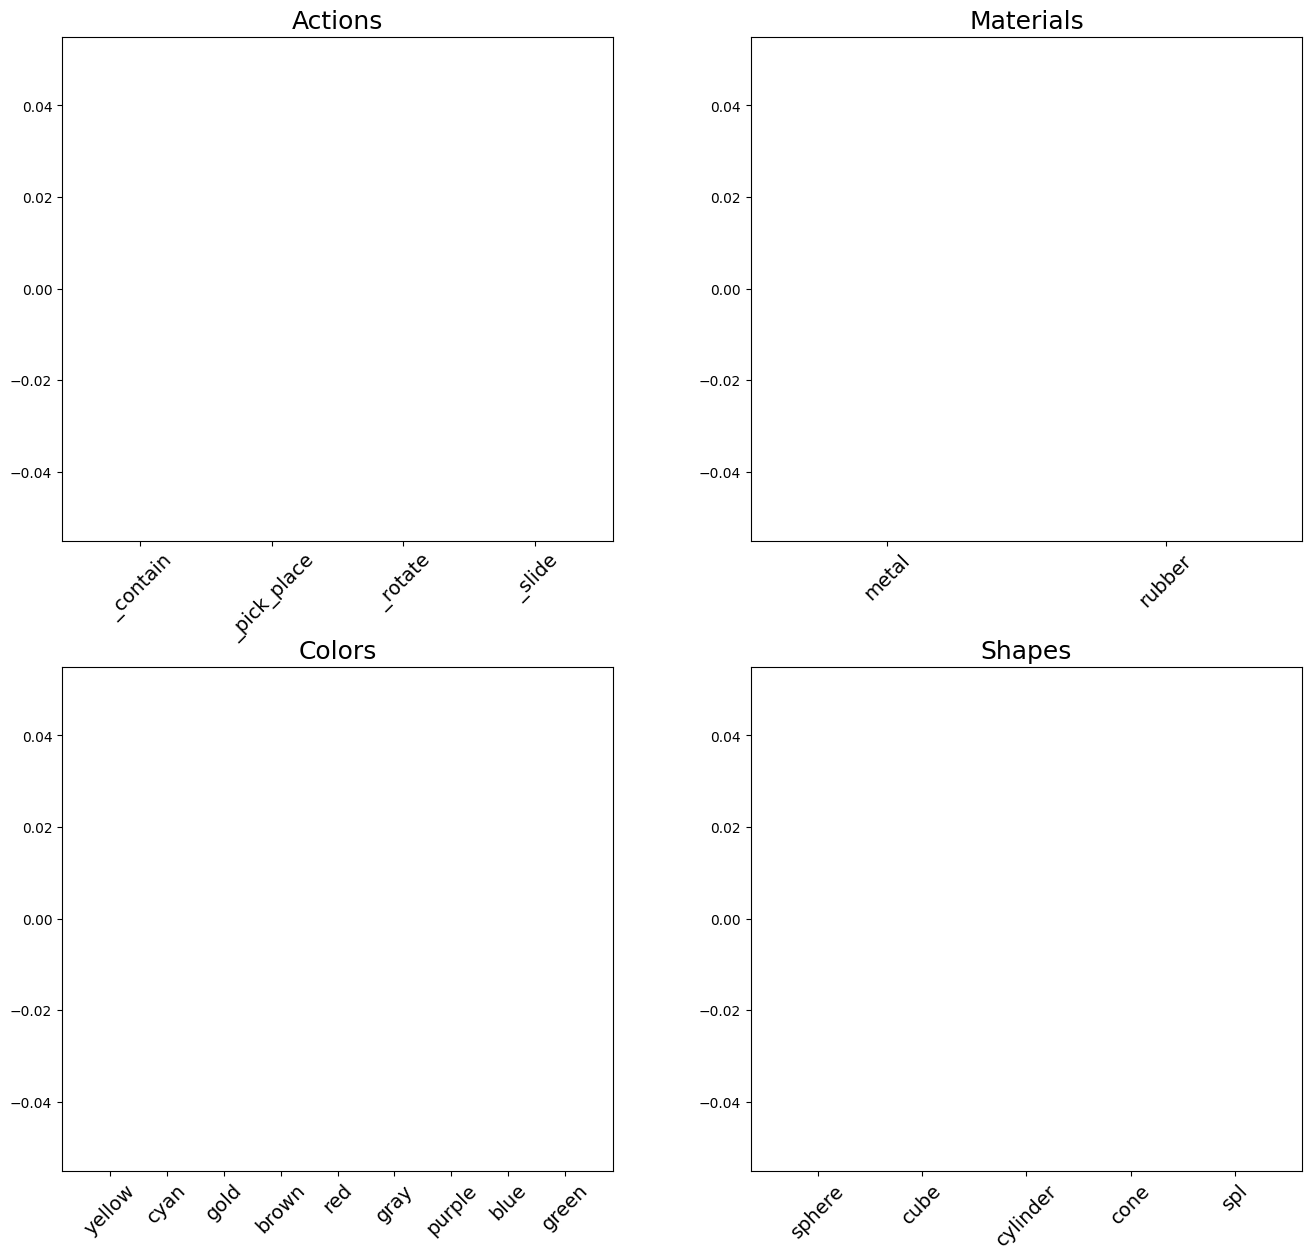

In [25]:
title_size = 18
label_size = 14

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))
plt.title('Distribution of the dataset', fontsize=title_size)
plt.subplots_adjust(wspace=0.25, hspace=0.25, top=0.92)

# Plot 1
actions = result[2:6]
axes[0, 0].bar(DICTIONARY[2:6], actions, color=['red', 'green', 'blue', 'yellow'])
axes[0, 0].set_title('Actions', fontsize=title_size)
axes[0, 0].set_xticklabels(DICTIONARY[2:6], rotation=45, fontsize=label_size)

# Plot 2
materials = result[6:8]
axes[0, 1].bar(DICTIONARY[6:8], materials, color=['cyan', 'green'])
axes[0, 1].set_title('Materials', fontsize=title_size)
axes[0, 1].set_xticklabels(DICTIONARY[6:8], rotation=45, fontsize=label_size)

# Plot 3
colors = result[8:17]
axes[1, 0].bar(DICTIONARY[8:17], colors, color=['yellow', 'cyan', 'gold', 'brown', 'red', 'gray', 'purple', 'blue', 'green'])
axes[1, 0].set_title('Colors', fontsize=title_size)
axes[1, 0].set_xticklabels(DICTIONARY[8:17], rotation=45, fontsize=label_size)

# Plot 4
shapes = result[17:22]
axes[1, 1].bar(DICTIONARY[17:22], shapes, color=['yellow', 'cyan', 'red', 'green', 'gold'])
axes[1, 1].set_title('Shapes', fontsize=title_size)
axes[1, 1].set_xticklabels(DICTIONARY[17:22], rotation=45, fontsize=label_size)

fig.suptitle('Distribution of the dataset properties', fontsize=22)
#plt.tight_layout()
plt.show()


In [10]:
plt

<module 'matplotlib.pyplot' from '/home/ramtin/miniconda3/envs/thesis/lib/python3.10/site-packages/matplotlib/pyplot.py'>

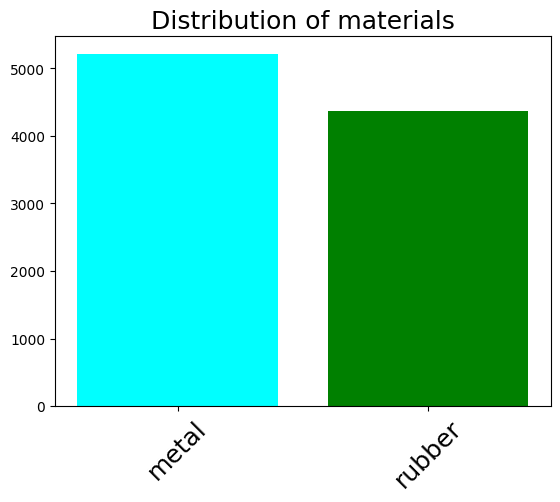

In [38]:
materials = result[6:8]
title = 'Distribution of materials'
color = ['cyan', 'green']
plt.bar(DICTIONARY[6:8], materials, color=color)
plt.title(title,fontsize=18)
plt.xticks(rotation=45, fontsize=18)

plt.show()

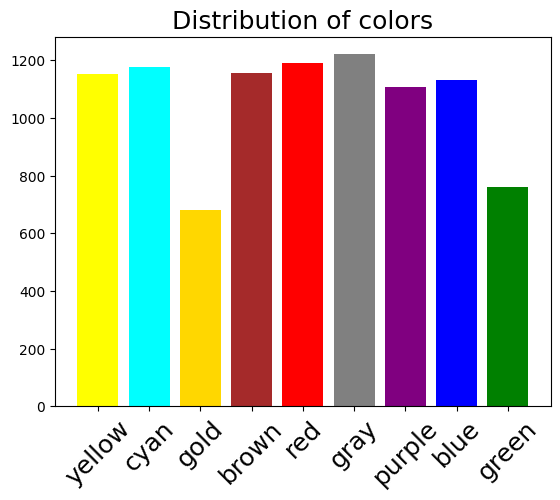

In [39]:
colors = result[8:17]
title = 'Distribution of colors'
color = ['yellow', 'cyan', 'gold', 'brown', 'red', 'gray', 'purple', 'blue', 'green']
plt.bar(DICTIONARY[8:17], colors, color=color)
plt.title(title,fontsize=18)
plt.xticks(rotation=45, fontsize=18)

plt.show()

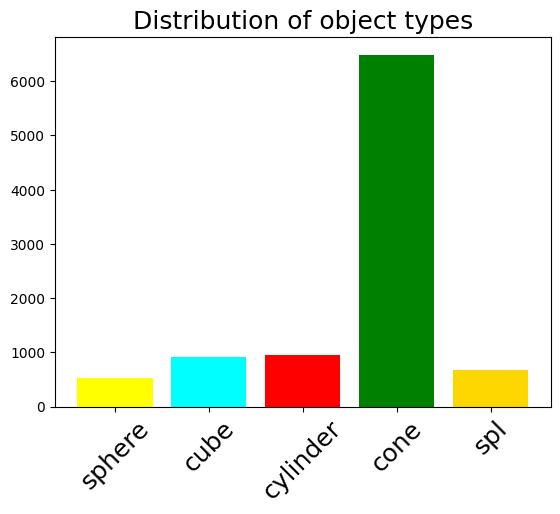

In [40]:
obj_types = result[17:22]
title = 'Distribution of object types'
color = ['yellow', 'cyan', 'red', 'green', 'gold']
plt.bar(DICTIONARY[17:22], obj_types, color=color)
plt.title(title,fontsize=18)
plt.xticks(rotation=45, fontsize=18)

plt.show()

In [45]:
result

array([   0.,    0., 4007., 2455., 1451., 1663., 5210., 4366., 1154.,
       1175.,  682., 1157., 1190., 1220., 1107., 1130.,  761.,  527.,
        916.,  960., 6491.,  682.])

# Now the same thing for VQ

In [7]:
import dataset_multimodal

In [37]:
ds = dataset_multimodal.MultimodalSimulation("../dataset_casper/", "training",1,4,6,9,False,5000)

In [38]:
ds[0][2]

tensor([ 3, 14, 10], dtype=torch.uint8)

In [39]:
result_vq = np.zeros((22))
for i in tqdm(range(len(ds))):
    for j in range(3):
        result_vq[ds[i][2][j]] += 1
result_vq

100%|██████████| 5000/5000 [12:43<00:00,  6.55it/s]


array([1275., 1274., 1226., 1225.,  567.,  545.,  560.,  540.,  568.,
        552.,  552.,  568.,  548.,  821.,  840.,  852.,  820.,  835.,
        832.,    0.,    0.,    0.])

In [40]:
DICTIONARY = ["put down", "picked up", "pushed left", "pushed right",
                  "apple", "banana", "cup", "football", "book", "pylon", "bottle", "star", "ring",
                  "red", "green", "blue", "yellow", "white", "brown"]
print(DICTIONARY[0:4])
print(DICTIONARY[4:13])
print(DICTIONARY[13:])

['put down', 'picked up', 'pushed left', 'pushed right']
['apple', 'banana', 'cup', 'football', 'book', 'pylon', 'bottle', 'star', 'ring']
['red', 'green', 'blue', 'yellow', 'white', 'brown']


In [41]:
result_vq.shape

(22,)

/tmp/ipykernel_3835/438090863.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(DICTIONARY[:4], rotation=45, fontsize=label_size)
/tmp/ipykernel_3835/438090863.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(DICTIONARY[4:13], rotation=45, fontsize=label_size)
/tmp/ipykernel_3835/438090863.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(DICTIONARY[13:], rotation=45, fontsize=label_size)


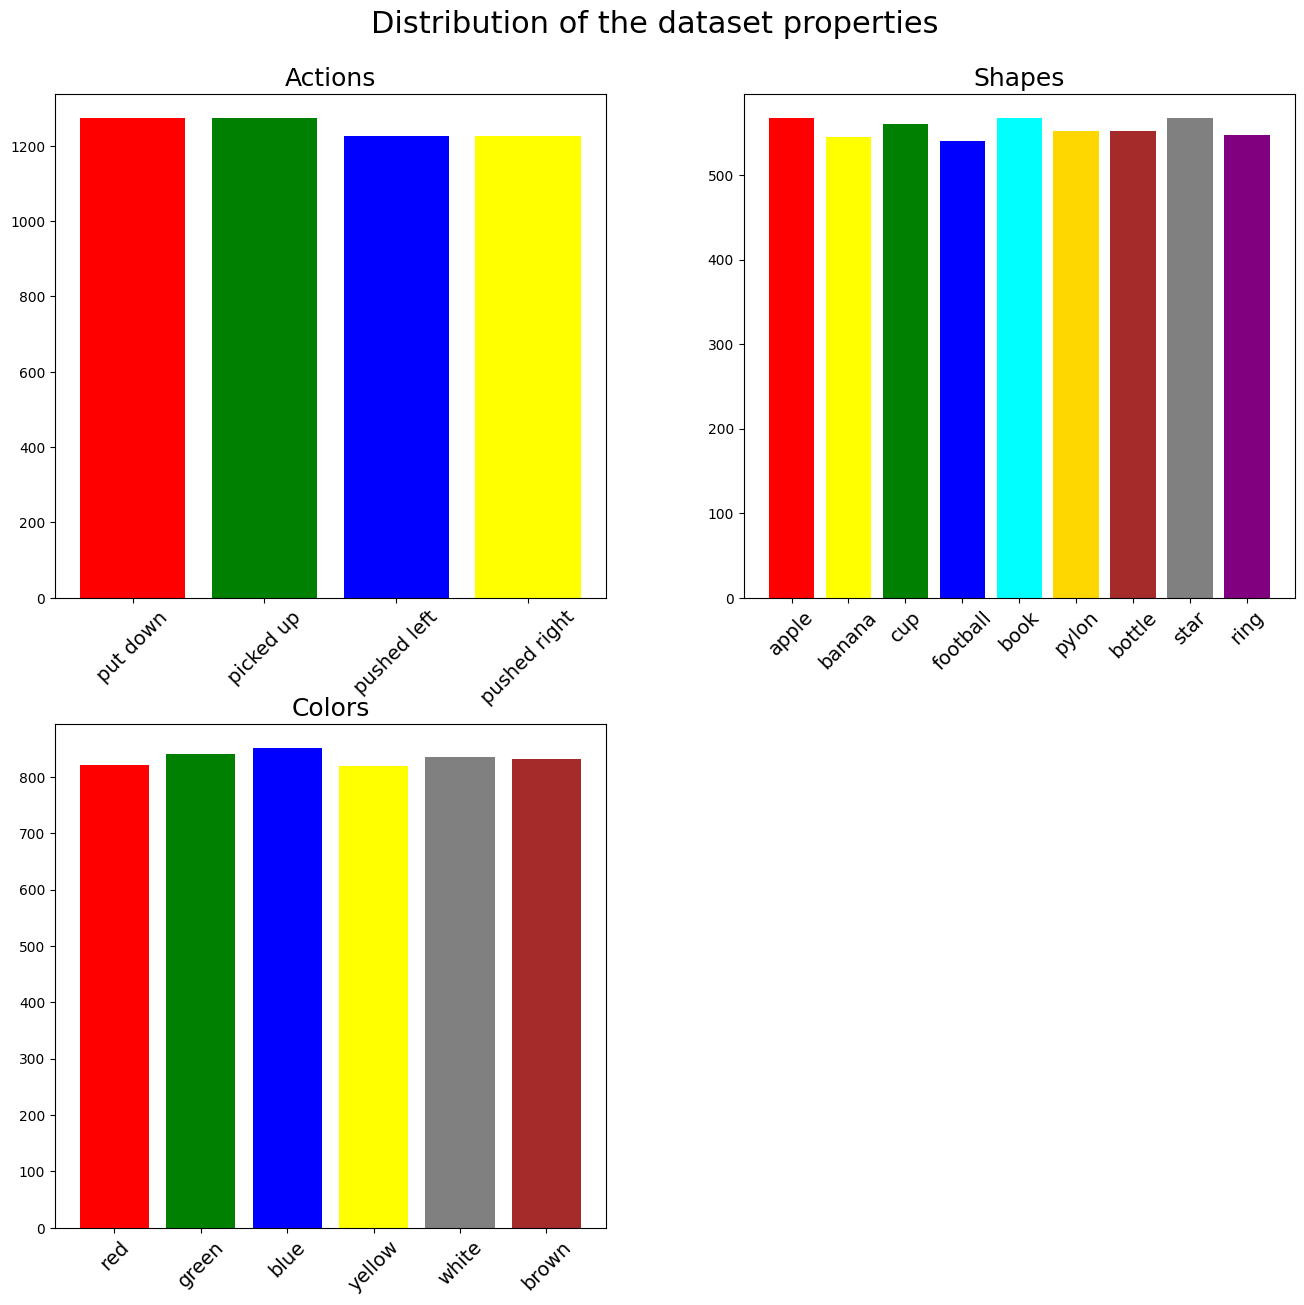

In [43]:
title_size = 18
label_size = 14

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))
plt.title('Distribution of the dataset', fontsize=title_size)
plt.subplots_adjust(wspace=0.25, hspace=0.25, top=0.92)

# Plot 1
actions = result_vq[:4]
axes[0, 0].bar(DICTIONARY[:4], actions, color=['red', 'green', 'blue', 'yellow'])
axes[0, 0].set_title('Actions', fontsize=title_size)
axes[0, 0].set_xticklabels(DICTIONARY[:4], rotation=45, fontsize=label_size)

# Plot 2
obj_types = result_vq[4:13]
axes[0, 1].bar(DICTIONARY[4:13], obj_types, color=['red', 'yellow', 'green', 'blue', 'cyan', 'gold', 'brown', 'gray', 'purple'])
axes[0, 1].set_title('Shapes', fontsize=title_size)
axes[0, 1].set_xticklabels(DICTIONARY[4:13], rotation=45, fontsize=label_size)

# Plot 3
colors = result_vq[13:19]
axes[1, 0].bar(DICTIONARY[13:], colors, color=["red", "green", "blue", "yellow", "gray", "brown"])
axes[1, 0].set_title('Colors', fontsize=title_size)
axes[1, 0].set_xticklabels(DICTIONARY[13:], rotation=45, fontsize=label_size)

# Plot 4
# Set bottom right axis to invisible
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['bottom'].set_visible(False)
axes[1, 1].spines['left'].set_visible(False)
axes[1, 1].tick_params(axis='both', which='both', length=0)
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])
axes[1, 1].set_title('', fontsize=title_size)

fig.suptitle('Distribution of the dataset properties', fontsize=22)
#plt.tight_layout()
plt.show()